In [2]:
from IPython.display import display, HTML
display(
    HTML("""
<style>
* {font-family:D2Coding;}
div.container{width:87% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input { font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:3px;}
table.dataframe{font-size:12px;}
</style>
"""))

# <span style='color:red'>Ch1. NLTK 자연어처리 패키지</span>

# 1. NLTK 패키지

- 자연어처리를 위한 강력하고, 사용하기 쉬운 라이브러리
  
1. 텍스트 전처리 : 토큰화(어절, 문장나누기), 정규화(정규표현식 활용), 불용어 제거, 표제어 추출 (기본형태로 변환)
2. 품사태킹 : 단어 품사 식별
3. 어휘 데이터 베이스 사용
4. 구조화된 문서의 빈도수, 분류분석, 연관분석, 감정분석 (단점) 속도가 느림
   - 그래서 pip install nltk==3.7 설치



In [3]:
import nltk

In [3]:
# 말뭉치를 다운로드
# c:/nltk_data
# d:/nltk_data
# c:/Users/내컴퓨터이름/nltk_data
# c:/Users/내컴퓨터이름/anaconda3/nltk_data
# c:/Users/내컴퓨터이름/anaconda3/lib/nltk_data
# c:/Users/내컴퓨터이름/anaconda3/share/nltk_data
# c:/Users/내컴퓨터이름/Appdata/Roaming/nltk_data
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [14]:
# 말뭉치 리스트
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [15]:
# 말뭉치 데이터 셋 (소설 엠마내용)
emma = nltk.corpus.gutenberg.raw('austen-emma.txt')
emma[:40]

'[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCH'

In [16]:
# 말뭉치 글자수, 문장수, 단어수
print('글자수 :', len(emma))

글자수 : 887071


In [17]:
# sent_tokenize() : 문장단위로 나눠 list 반환
from nltk.tokenize import sent_tokenize

sent_tokens = sent_tokenize(emma)
sent_tokens[:3]

print('문장수 : ', len(sent_tokens))
print("%r" % sent_tokens[0])

문장수 :  7456
'[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.'


In [18]:
# word_tokenize() : 단어토큰으로 쪼갠 list 반환
from nltk.tokenize import word_tokenize

print(word_tokenize(sent_tokens[0]))

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', ',', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', ';', 'and', 'had', 'lived', 'nearly', 'twenty-one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her', '.']


In [19]:
print("단어수 :", len(word_tokenize(emma)))

단어수 : 191776


In [20]:
# RegexpTokenizer() : 토큰화할 떄 해당 정규표현식에 해당하는 word만 적용
from nltk.tokenize import RegexpTokenizer

digiRet = RegexpTokenizer('\d+')  # 숫자만
alphaRet = RegexpTokenizer('\w+')  # 글자만

digis = digiRet.tokenize(sent_tokens[0])
print(digis)

words = alphaRet.tokenize(sent_tokens[0])
print(words)

['1816']
['Emma', 'by', 'Jane', 'Austen', '1816', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', 'and', 'had', 'lived', 'nearly', 'twenty', 'one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her']


# 2. 형태소 (의미 있는 가장 작은 단위) 분석

In [21]:
words2 = ['sending', 'cooking', 'files', 'lives', 'crying', 'dying']

# 어간추출(1) : PorterStemmer
from nltk.stem import PorterStemmer

pst = PorterStemmer()
pst.stem(words2[0])

'send'

In [22]:
[pst.stem(word) for word in words2]

['send', 'cook', 'file', 'live', 'cri', 'die']

In [23]:
# 어간추출(2) : LancasterStemmer() 어간 추출하는 것 중 제일 빈도 높다
from nltk.stem import LancasterStemmer

lst = LancasterStemmer()

[lst.stem(word) for word in words2]

['send', 'cook', 'fil', 'liv', 'cry', 'dying']

In [24]:
# 어간 추출(3) : RegexpStemmer 정규표현식에 해당하는 부분만 어간 추출
from nltk.stem import RegexpStemmer

rst = RegexpStemmer('ing')
[rst.stem(word) for word in words2]

['send', 'cook', 'files', 'lives', 'cry', 'dy']

In [25]:
# 품사태킹
from nltk.tag import pos_tag

trgged_list = pos_tag(word_tokenize(sent_tokens[0]))
print(word_tokenize(sent_tokens[0]))
print('품사태킹한 결과', trgged_list)

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', ',', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', ';', 'and', 'had', 'lived', 'nearly', 'twenty-one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her', '.']
품사태킹한 결과 [('[', 'NNS'), ('Emma', 'NNP'), ('by', 'IN'), ('Jane', 'NNP'), ('Austen', 'NNP'), ('1816', 'CD'), (']', 'NNP'), ('VOLUME', 'NNP'), ('I', 'PRP'), ('CHAPTER', 'VBP'), ('I', 'PRP'), ('Emma', 'NNP'), ('Woodhouse', 'NNP'), (',', ','), ('handsome', 'NN'), (',', ','), ('clever', 'NN'), (',', ','), ('and', 'CC'), ('rich', 'JJ'), (',', ','), ('with', 'IN'), ('a', 'DT'), ('comfortable', 'JJ'), ('home', 'NN'), ('and', 'CC'), ('happy', 'JJ'), ('disposition', 'NN'), (',', ','), ('seemed', 'VBD'), ('to', 'TO'), ('unite', 'VB'), (

## 퀴즈 : emma 소설안에서
1. 특수문자가 들어가지 않은 3글자 이상 되는 단어만 추출해서 폼사태킹을 하시요.
   - ex) [('emma', '명사'), ('was','동')...]
2. "Emma" 단어가 몇번 등장하며, 품사태킹이 어떤 품사들로 되어 있는지 모두 출력하시오.
3. 내가 원하는 품사(명사)의 단어만 뽑아 등장하는 명사의 종류 갯수를 출력하시오

In [26]:
%%time
from nltk.tokenize import RegexpTokenizer

# 1. 특수문자가 들어가지 않은 3글자 이상 되는 단어만 추출해서 폼사태킹을 하시요.

ret = RegexpTokenizer('\w{3,}')  # 글자만

emma = nltk.corpus.gutenberg.raw('austen-emma.txt')

emma_words = ret.tokenize(emma)
emma_tags = pos_tag(emma_words)

# print(emma_tags)

print('emma 소설에서 3글자 이상의 단어 출현수 : ', len(emma_words), len(emma_tags))
print('emma 소설에서 3글자 이상의 단어 종류수 : ', len(set(emma_words)), len(set(emma_tags)))

emma 소설에서 3글자 이상의 단어 출현수 :  123877 123877
emma 소설에서 3글자 이상의 단어 종류수 :  7630 11678
CPU times: user 2.31 s, sys: 17.3 ms, total: 2.32 s
Wall time: 2.32 s


In [27]:
print(emma_words[:5])
print(emma_tags[:5])

['Emma', 'Jane', 'Austen', '1816', 'VOLUME']
[('Emma', 'NNP'), ('Jane', 'NNP'), ('Austen', 'NNP'), ('1816', 'CD'), ('VOLUME', 'NNP')]


In [28]:
# 2. "Emma" 단어가 몇번 등장하며, 품사태킹이 어떤 품사들로 되어 있는지 모두 출력하시오.
pos = []  # 품사만
# for emma_tag in emma_tags:
#     if emma_tag[0] == 'Emma':
#         pos.append(emma_tag[1])

pos = [emma_tag[1] for emma_tag in emma_tags if emma_tag[0] == 'Emma']
print('Emma 출현횟수 : ', len(pos))
print('Emma의 품사 :', set(pos))
# Emma 출현횟수 :  865
# {'JJ', 'NNP', 'NNS', 'VBP', 'RB', 'NN', 'VBN', 'VB', 'VBD', 'NNPS'}
# 동사과거형, 동사, 고유명사복수, 동사, 고유명사, 형툥사, 명사, 동사과거분사, 형용사, 명사복수형

Emma 출현횟수 :  865
Emma의 품사 : {'NNS', 'VBP', 'VBD', 'VB', 'JJ', 'NN', 'VBN', 'RB', 'NNPS', 'NNP'}


In [29]:
# emma_tags에서 각 품사별 몇개씩 포스태그 되었는지?
# set(pos) # emma를 품사
pos_cnt = dict()

for word, tag in emma_tags:
    if word == 'Emma':
        if tag in pos_cnt:
            pos_cnt[tag] += 1
        else:
            pos_cnt[tag] = 1
pos_cnt

{'NNP': 838,
 'VBP': 4,
 'JJ': 4,
 'VB': 5,
 'NNS': 2,
 'RB': 1,
 'NN': 7,
 'NNPS': 2,
 'VBN': 1,
 'VBD': 1}

In [30]:
import pandas as pd

pos_cnt = pd.Series([0] * len(set(pos)), index=set(pos))

for word, tag in emma_tags:
    if word == 'Emma':
        if tag in pos_cnt:
            pos_cnt[tag] += 1
pos_cnt.sort_values(ascending=False)

NNP     838
NN        7
VB        5
VBP       4
JJ        4
NNS       2
NNPS      2
VBD       1
VBN       1
RB        1
dtype: int64

In [31]:
# 3. 내가 원하는 품사(명사)의 단어만 뽑아 등장하는 명사의 종류 갯수를 출력하시오
nonus_list = []  # 명사들만

# for word, tag in emma_tags:

#     if (tag == 'NN') | (tag == 'NNS') | (tag == 'NNP') | (tag == 'NNPS') :
#         nonus_list.append(word)

nonus_list = [
    word for word, tag in emma_tags
    if (tag == 'NN') | (tag == 'NNS') | (tag == 'NNP') | (tag == 'NNPS')
]

print('명사가 출현한 횟수 : ', len(nonus_list))
print('출현한 명사의 갯수 : ', len(set(nonus_list)))
print('한 단어가 나오는 평균 빈도수 : ', len(nonus_list) / len(set(nonus_list)))

명사가 출현한 횟수 :  30781
출현한 명사의 갯수 :  4165
한 단어가 나오는 평균 빈도수 :  7.3903961584633855


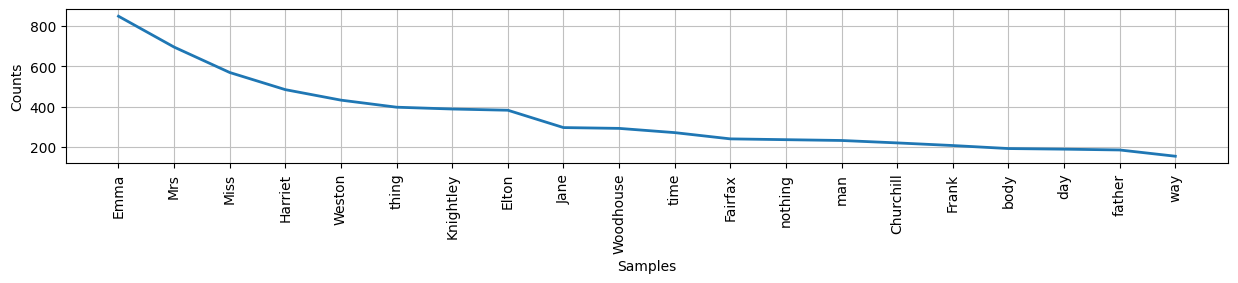

In [32]:
# 최빈 단어 시각화
import matplotlib.pyplot as plt
from nltk import Text

emma_text = Text(nonus_list)
plt.figure(figsize=(15, 2))
emma_text.plot(20)
plt.show()

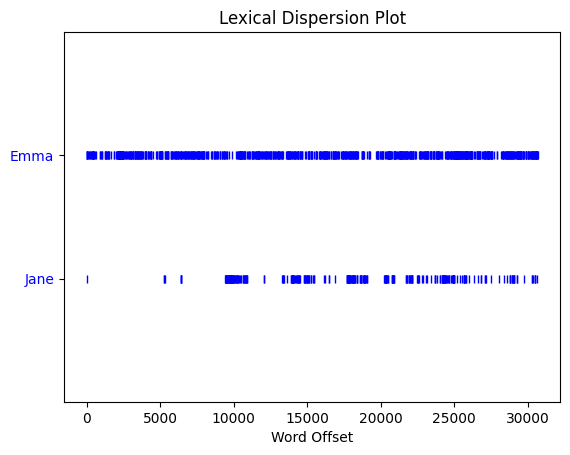

In [33]:
emma_text.dispersion_plot(['Emma', 'Jane'])

In [34]:
# 고유명사
names_list = [
    word for word, tag in emma_tags if (tag == 'NNP') | (tag == 'NNPS')
]
print('고유명사의 갯수 :', len(set(names_list)))

from nltk import FreqDist

FreqDist(names_list)  # 빈도를 반환

고유명사의 갯수 : 654


FreqDist({'Emma': 840, 'Mrs': 696, 'Miss': 569, 'Harriet': 484, 'Weston': 433, 'Knightley': 389, 'Elton': 382, 'Jane': 295, 'Woodhouse': 293, 'Fairfax': 241, ...})

In [35]:
dic = dict(FreqDist(names_list))
wordcnt = pd.Series(dic)
wordcnt.sort_values(ascending=False, inplace=True)
wordcnt.head()

Emma       840
Mrs        696
Miss       569
Harriet    484
Weston     433
dtype: int64

In [36]:
wordcnt[wordcnt > 400]

Emma       840
Mrs        696
Miss       569
Harriet    484
Weston     433
dtype: int64

In [37]:
names = wordcnt[wordcnt > 400]
names.index

Index(['Emma', 'Mrs', 'Miss', 'Harriet', 'Weston'], dtype='object')

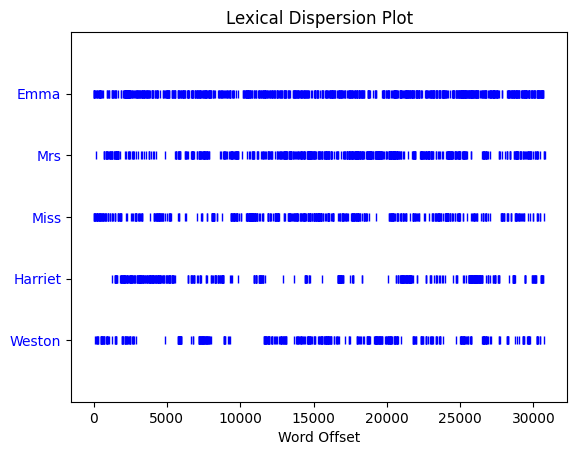

In [38]:
emma_text.dispersion_plot(list(names.index))